#EDA(Exploratory Data Analysis)

In [2]:
from google.colab import drive
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Model
from keras.layers import Input, Dense
from sklearn.metrics import accuracy_score, roc_auc_score

In [4]:
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Assignment 3/CustomerChurn_dataset.csv')

In [ ]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data = data.drop('customerID', axis=1)

In [ ]:
print(data.shape)

(7043, 20)


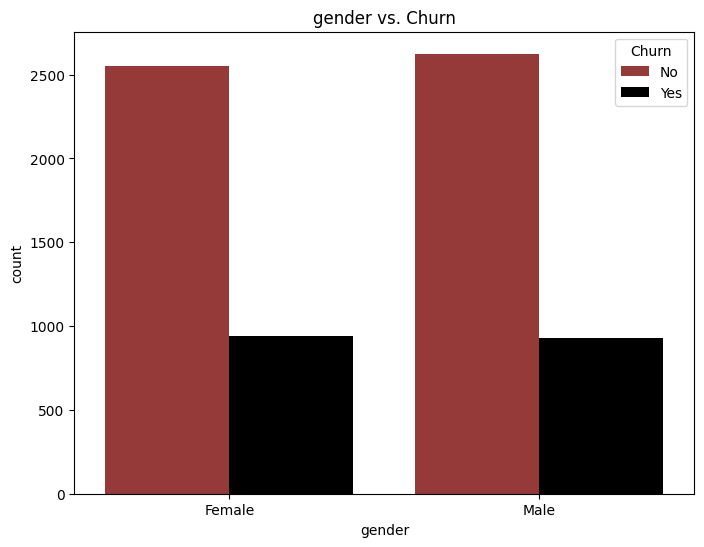

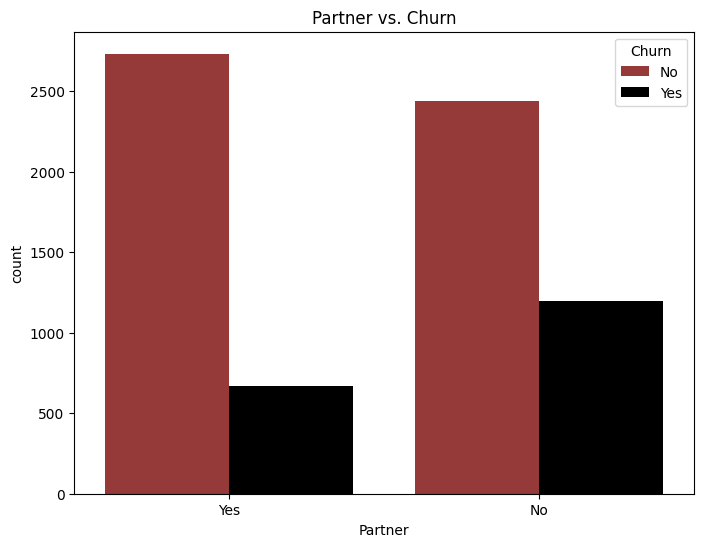

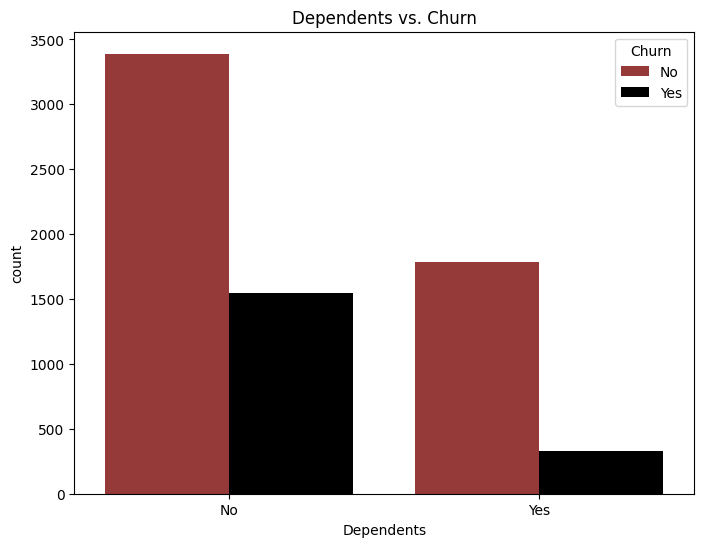

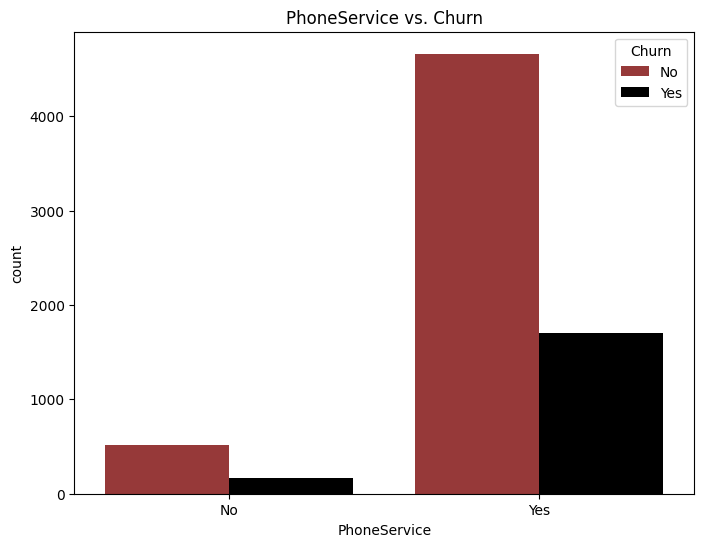

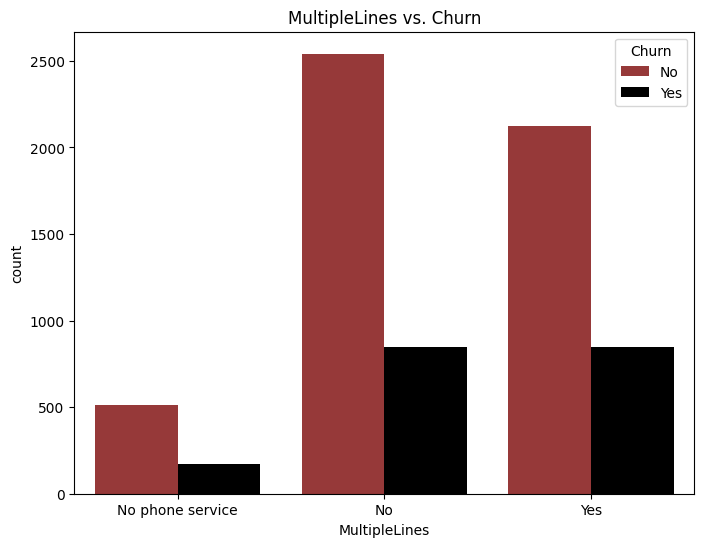

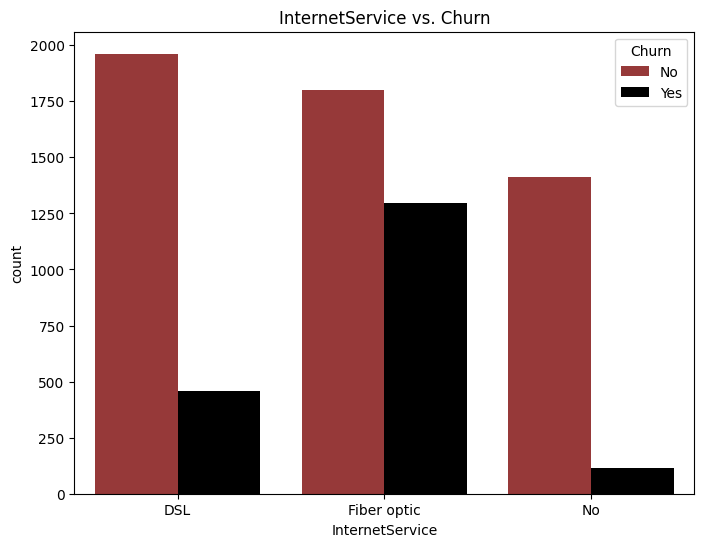

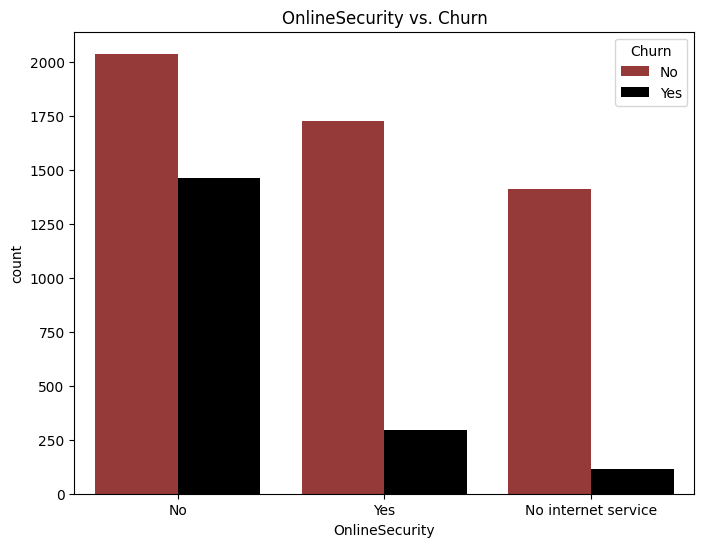

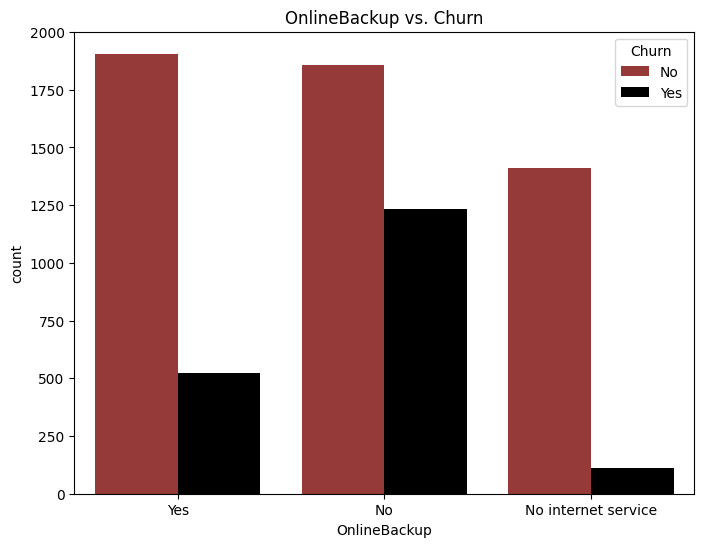

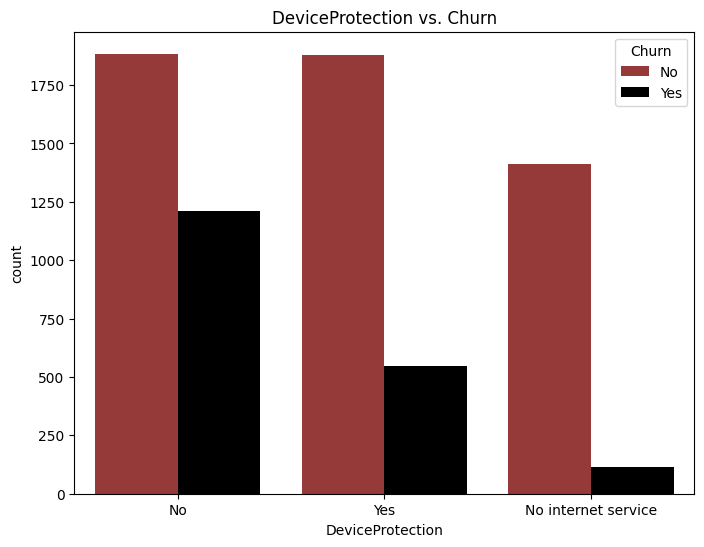

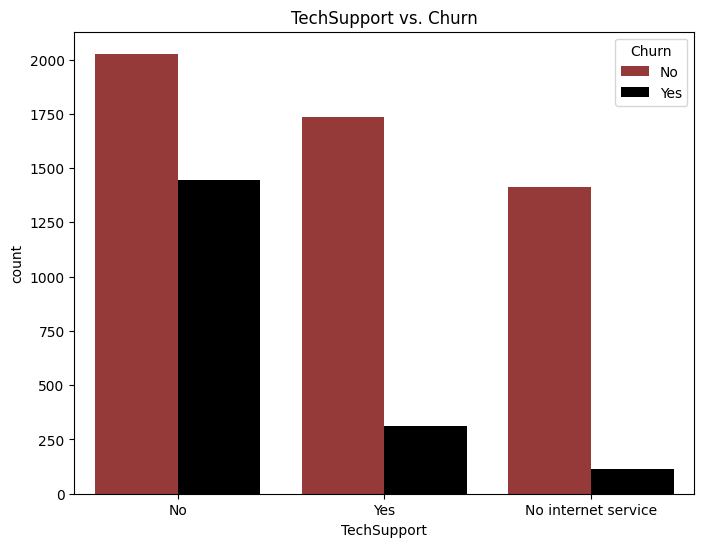

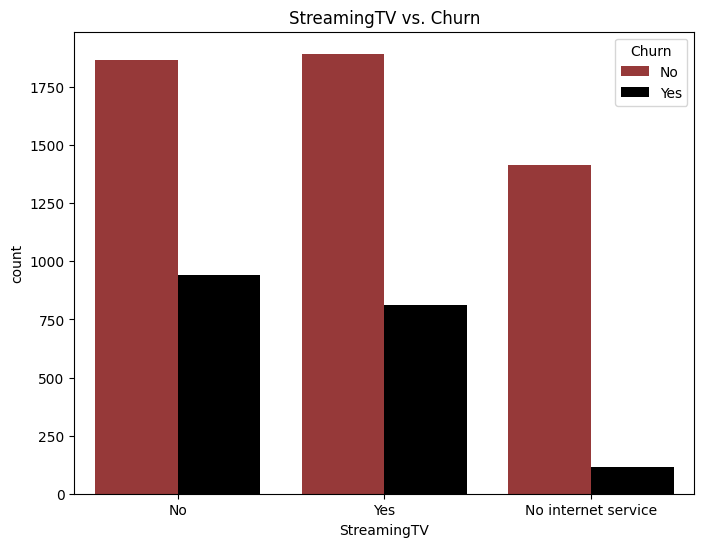

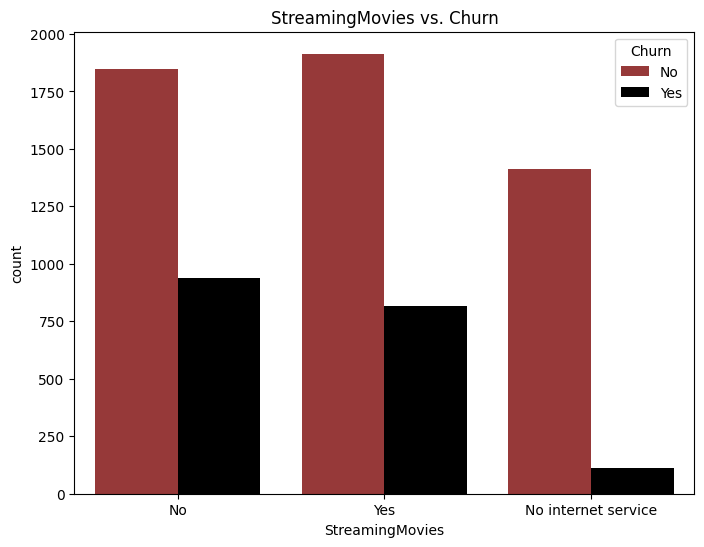

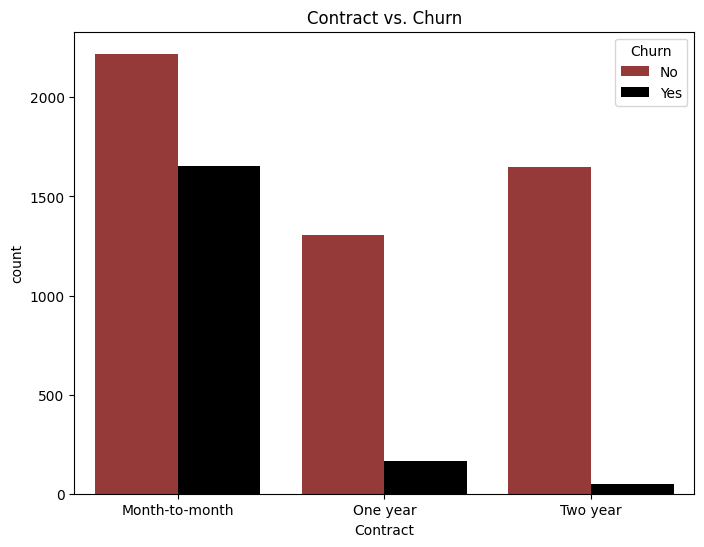

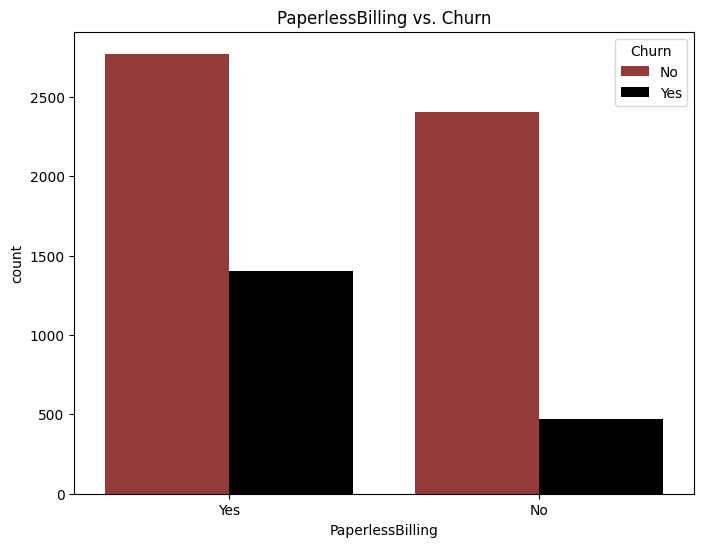

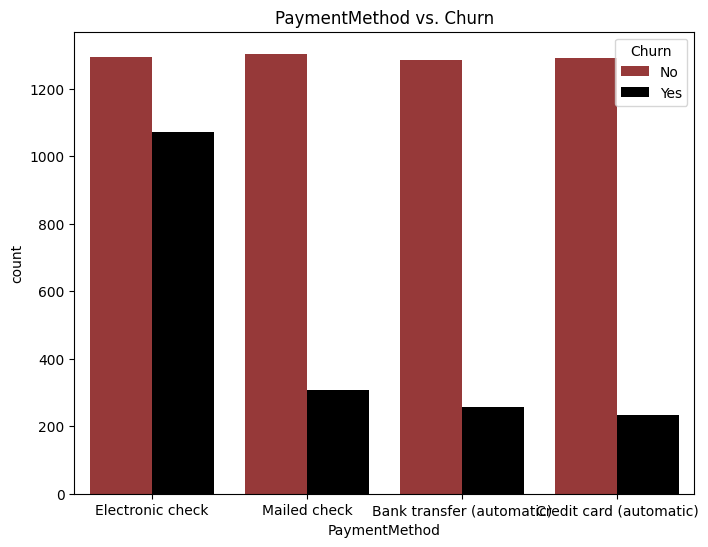

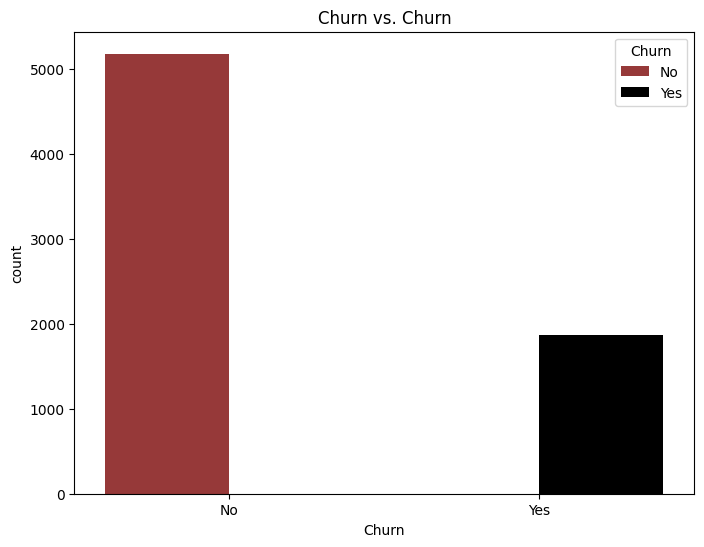

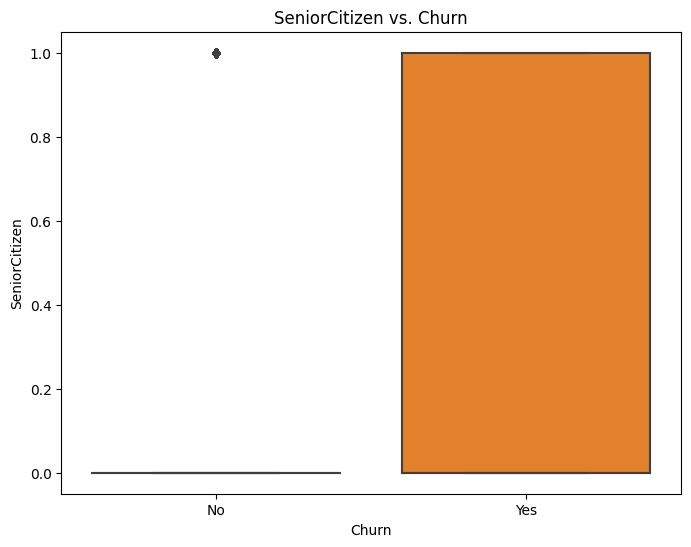

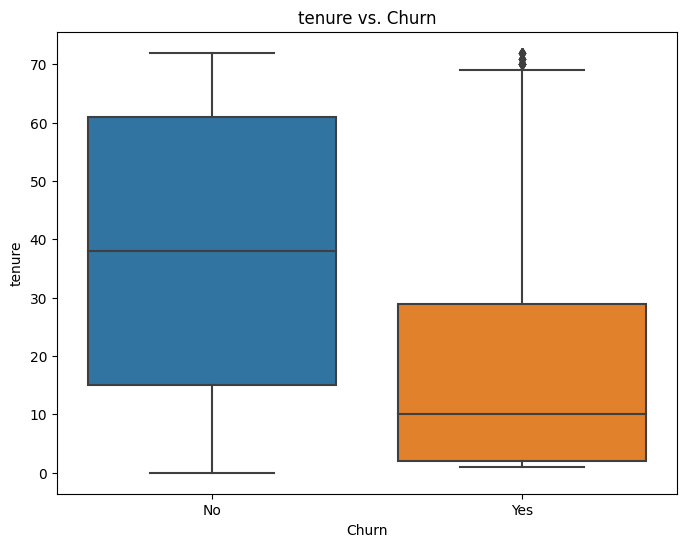

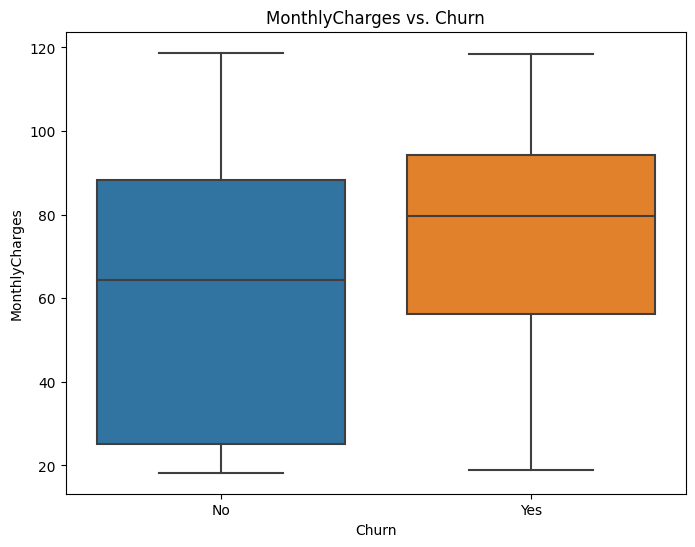

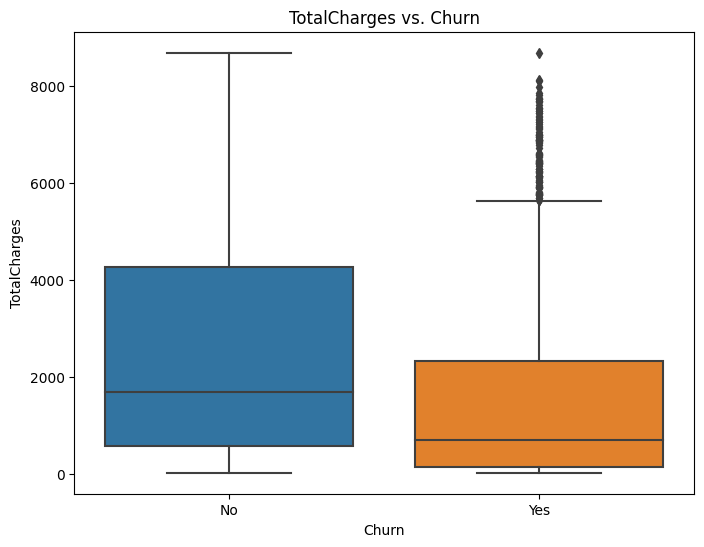

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_columns = data.select_dtypes(include=['object'])
custom_palette = ['brown', 'black']
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, hue='Churn', data=data, palette=custom_palette)
    plt.title(f'{column} vs. Churn')
    plt.show()

numerical_columns = data.select_dtypes(exclude=['object'])

for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Churn', y=column, data=data)
    plt.title(f'{column} vs. Churn')
    plt.show()


Analysis
- churn rates are slightly higher for females.
- When considering partners, those without partners churn more.
- subscribers with phone service churn less than those without
- Customers with fiber-optic internet service churn substantially more than those with DSL
- customers without online security, online backup, device protection, and tech support churn more
- month-to-month customers churn the most,
- those with paperless billing churn more than those without
-  Customers using electronic checks churn more than those using mailed checks, bank transfers, or credit cards.

<ipython-input-10-afd204760bcc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


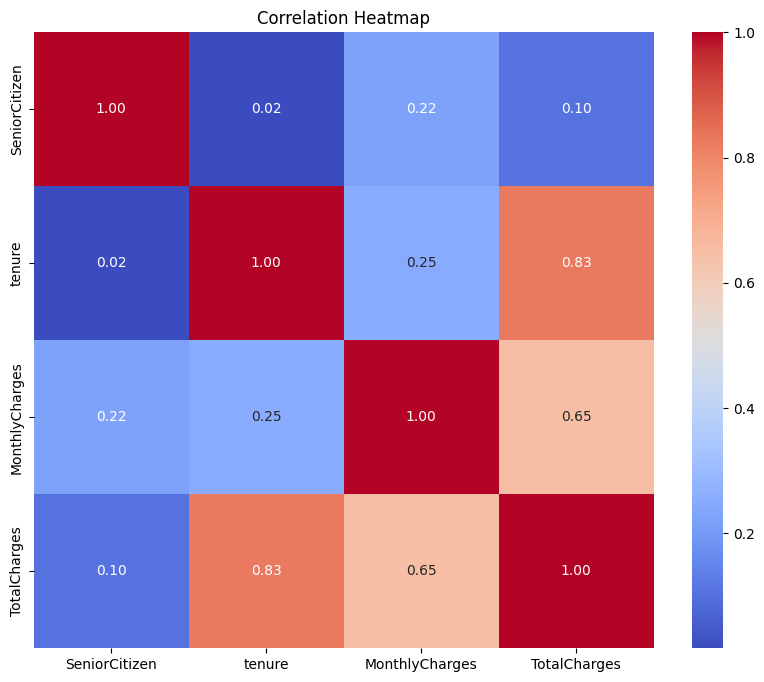

In [10]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Analysis
analyzing tenure and charges, I found that newer customers and those with higher monthly charges are more likely to churn, while those with higher total charges, likely long-term customers, show lower churn rates. This suggests that long-term customers find value in the service over time, offsetting the accumulated cost.

# feature selection

In [ ]:
# Split dataset into categorical and numeric
categorical_data =data.select_dtypes(include=['object'])
numeric_data = data.select_dtypes(exclude=['object'])


#imputing numeric
imp=SimpleImputer()
imputed_data=imp.fit_transform(numeric_data)
df_numeric =pd.DataFrame(imputed_data, columns=numeric_data.columns)


#imputing non_numeric
modes = categorical_data.mode().iloc[0]
categorical_data = categorical_data.fillna(modes)

In [ ]:
New_data = pd.concat([df_numeric,categorical_data], axis=1)

In [ ]:
columns_to_label_encode = ['MultipleLines','DeviceProtection','TechSupport','StreamingTV','StreamingTV','StreamingMovies', 'Partner','PaperlessBilling',
                           'Dependents','PhoneService','gender','OnlineSecurity','Churn','OnlineBackup','InternetService']

label_encoder = LabelEncoder()
for column in columns_to_label_encode:
    New_data[column] = label_encoder.fit_transform(New_data[column])

In [ ]:
columns_to_onehot_encode = ['PaymentMethod','Contract']
New_data = pd.get_dummies(New_data, columns=columns_to_onehot_encode)

In [ ]:
y = New_data['Churn']
X = New_data.drop('Churn', axis=1)

In [ ]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

# new DataFrame with the scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

data = pd.concat([X_scaled_df, y], axis=1)

In [ ]:
X = data.drop('Churn', axis=1)
y = data['Churn']

# Split the data into training and testing sets (if necessary)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a tree-based model (Random Forest in this example)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# RFECV object
rfecv = RFECV(estimator=model, step=1, cv=3, scoring='accuracy')

rfecv.fit(X_train, y_train)

# elected features
selected_features = X_train.columns[rfecv.support_]

In [ ]:
optimal_num_features = rfecv.n_features_
support_mask = rfecv.support_
selected_features = X.columns[support_mask]

In [ ]:
selected_features

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'gender',
       'Partner', 'Dependents', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'PaperlessBilling', 'PaymentMethod_Electronic check',
       'Contract_Month-to-month'],
      dtype='object')

# Multi-Layer Perceptron model using the Functional API



Installing Keras-tuner

In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.8 MB/s eta 0:00:00


Installing scikeras and tensorflow packages

In [ ]:
!pip install tensorflow scikeras scikit-learn

Importing the necessary Librairies from the packages

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm
from sklearn.metrics import matthews_corrcoef
from imblearn.metrics import geometric_mean_score
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from sklearn.metrics import classification_report

splitting my data using the selected features from above

In [ ]:
y = data['Churn']
X = data[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Resampling the data to avoid overfitting

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
# Initialize the RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

# Apply random oversampling to the training data
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)
print("Resampled class distribution:", np.bincount(y_train_resampled))
print("Original class distribution:", np.bincount(y_train))

Resampled class distribution: [4138 4138]
Original class distribution: [4138 1496]


Initialising some key parameters to be used for training

In [ ]:
num_classes=1
epochs=50
batch_size=10

Creating a copy of X

In [ ]:
X_Corr=X.copy()

Defining a function that creates a Nueral network model using TensorFlow's Keras API.

In [ ]:
def create_model(dropout_rate, weight_constraint,neurons,activation):
  # create modeloptimizer=optimizer
  input_shape = (X_Corr.shape[1],)
  inputs = tf.keras.Input(shape=input_shape)
  input = tf.keras.layers.Dense((28)+neurons, activation=activation)(inputs)
  x= tf.keras.layers.Dropout(dropout_rate)(input)
  second=tf.keras.layers.Dense((12)+neurons, activation=activation)(x)
  x= tf.keras.layers.Dropout(dropout_rate)(second)
  third=tf.keras.layers.Dense((4)+neurons, activation=activation)(x)
  x= tf.keras.layers.Dropout(dropout_rate)(third)
  fourth=tf.keras.layers.Dense((-4)+neurons, activation=activation)(x)
  x= tf.keras.layers.Dropout(dropout_rate)(fourth)
  fifth=tf.keras.layers.Dense((-12)+neurons, activation=activation)(x)
# Add more hidden layers if necessary

# Add output layer with softmax activation
  outputs = tf.keras.layers.Dense(num_classes, activation='sigmoid')(fifth)

# Create the model
  m = tf.keras.Model(inputs=inputs, outputs=outputs)
  m.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
  return m

Training the model using cross validation and gridsearch

In [ ]:
model = KerasClassifier(model=create_model, epochs=epochs, batch_size=batch_size, verbose=0)
dropout_rate = [0.3, 0.5]
weight_constraint = [3.0, 5.0]
neurons = [20]
optimizer = ['SGD', 'Adam', 'RMSProp']
activation = ['relu',]
param_grid = dict(model__dropout_rate=dropout_rate, model__weight_constraint=weight_constraint,
                  model__neurons=neurons,model__activation=activation)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=inner_cv, scoring='accuracy')
# Initialize lists to store outer fold results
outer_scores = []
best_models = []
for train_idx, val_idx in outer_cv.split(X_train_resampled, y_train_resampled):
    X_train_outer, X_val_outer = X_train_resampled.iloc[train_idx], X_train_resampled.iloc[val_idx]
    y_train_outer, y_val_outer = y_train_resampled.iloc[train_idx], y_train_resampled.iloc[val_idx]

    # Perform hyperparameter tuning in the inner loop
    grid_search.fit(X_train_outer, y_train_outer)
    best_model = grid_search.best_estimator_
    best_models.append(best_model)

    # Evaluate the best model on the outer validation set
    y_pred_outer = best_model.predict(X_val_outer)
    accuracy = accuracy_score(y_val_outer, y_pred_outer)
    outer_scores.append(accuracy)

Evaluating the model on the validation set

In [ ]:
print("Outer CV Scores:", outer_scores)
print("Mean Accuracy:", np.mean(outer_scores))
print("Standard Deviation:", np.std(outer_scores))

Outer CV Scores: [0.7693236714975845, 0.7673716012084593, 0.7516616314199396, 0.7589123867069486, 0.7589123867069486]
Mean Accuracy: 0.7612363355079761
Standard Deviation: 0.00641128572218394


Training the model again using best parameters

In [ ]:
# Train the final model on the entire training set with the best hyperparameters
final_best_model_mlp = grid_search.best_estimator_
print("The best estimator:",grid_search.best_estimator_, "\n")


final_best_model_mlp.fit(X_train_resampled, y_train_resampled,epochs=epochs, batch_size=batch_size, verbose=0)

The best estimator: KerasClassifier(
	model=<function create_model at 0x7c24c75843a0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=10
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=50
	model__activation=relu
	model__dropout_rate=0.3
	model__neurons=20
	model__weight_constraint=5.0
	class_weight=None
) 



KerasClassifier(
	model=<function create_model at 0x7c24c75843a0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=10
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=50
	model__activation=relu
	model__dropout_rate=0.3
	model__neurons=20
	model__weight_constraint=5.0
	class_weight=None
)

Evaluating the model on the test set

In [ ]:
# Evaluate the model and obtain predicted probabilities
y_pred = final_best_model_mlp.predict(X_test)
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(y_test, y_pred)
auc_mlp = round(metrics.roc_auc_score(y_test, y_pred), 4)
print("AUC:",auc_mlp)
y_pred=np.round(final_best_model_mlp.predict(X_test)).ravel()
print("\nCR by library method=\n",
          classification_report(y_test, y_pred))

AUC: 0.7808

CR by library method=
               precision    recall  f1-score   support

           0       0.91      0.77      0.83      1036
           1       0.55      0.80      0.65       373

    accuracy                           0.77      1409
   macro avg       0.73      0.78      0.74      1409
weighted avg       0.82      0.77      0.78      1409



In [ ]:
# Calculate accuracy
accuracy = round(accuracy_score(y_test, np.round(y_pred)),4)

# Print the overall accuracy
print(f"Overall Accuracy: {accuracy:.4f}")

Overall Accuracy: 0.7736


# Deployment

In [ ]:
final_best_model_mlp.auc = auc_mlp

In [ ]:
with open('Accuracy.txt', 'w') as f:
    f.write(f'AUC Score: {accuracy:.4f}')

In [ ]:
import pickle
# Use pickle to save the trained model
with open('final_best_model.plk', 'wb') as f:
    pickle.dump(final_best_model_mlp, f)